## Import
Import `numpy`, `pandas`, `matplotlib.pyplot`, and `scipy.stats`.

- `numpy` contains a large collection of mathematical functions
- `pandas` is a software library for Python that is designed for data manipulation and data analysis
- `matplotlib.pyplot` contains functions to create interactive plots
- `scipy.stats` is a module that contains a variety of statistical functions. 

We will be using these four libraries in this Notebook.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data Representation
This dataset contains the Top 500 most powerful non-distributed computer systems or supercomputers in the world. 

To objectively rank the performance of these computer systems, the **LINPACK Benchmark** is used. The benchmark measures the floating-point rate of execution of a computer where the computer is tasked to solve a complex system of linear equations. While it is not a complete indicator of the overall performance of a computer system, it is still accurate in estimating peak performance.

Only general-purpose systems are included in this list, which are supercomputers that can solve a range of scientific problems; this avoids any supercomputers being created only to solve the LINPACK Benchmark.

### Collection Process
The TOP500 project dates back to 1993 and since then, the list is compiled twice a year through online submissions and other published statistical lists.

Internet users and computer vendors may choose to submit the necessary information about a system online. Naturally, the data is carefully verified with the original manufacturers and in some cases, contact is established with the installation site. All of the data is collected and verified by the authors with the help of various contributors, like high-performance computer experts, computational scientists, and manufacturers. Any misinformation or corrections can also be reported to their website.

### Structure of the Dataset

The dataset was provided as a `.csv` file, which will be loaded into the notebook using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. The [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function is then called to display information about the dataset.

In [58]:
supercom_df = pd.read_csv("TOP500.csv")
supercom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    456 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             315 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    object 
 12  Accelerator/Co-Process

Each row in the dataset represents a single observation without any duplicate observations. According to the information shown above, there are 500 observations in the dataset, each one corresponding to a single supercomputer. 

Each column in the dataset refers to the variables an observation has. There are 37 variables in the dataset, which are the properties and information related to a supercomputer and its performance.

### Variables
The [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) property of the `DataFrame` is called to see the list of variables in the dataset.

In [59]:
supercom_df.columns

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Power Efficiency [GFlops/Watts]', 'Architecture',
       'Processor', 'Processor Technology', 'Processor Speed (MHz)',
       'Operating System', 'OS Family', 'Accelerator/Co-Processor',
       'Cores per Socket', 'Processor Generation', 'System Model',
       'System Family', 'Interconnect Family', 'Interconnect', 'Continent',
       'Site ID', 'System ID'],
      dtype='object')

The following are the descriptions of each of the variables used in the data set:
- **`Rank`**: position of the supercomputer in the TOP500 ranking system
- **`Previous Rank`**: position of the supercomputer in the previous edition of the TOP500 list, *if the supercomputer appeared in the previous edition*
- **`First Appearance`**: the edition of the TOP500 list where the supercomputer first appeared
- **`First Rank`**: position of the supercomputer in the TOP500 ranking system in its first appearance in the list
- **`Name`**: name of the supercomputer, *if the supercomputer has a name*
- **`Computer`**: type of the supercomputer as indicated by the manufacturer or vendor 
- **`Site`**: current location of the supercomputer
- **`Manufacturer`**: manufacturer of the supercomputer
- **`Country`**: current country where the supercomputer is located
- **`Year`**: year of installation or last major update of the supercomputer
- **`Segment`**: purpose of the supercomputer
- **`Total Cores`**: number of cores that the supercomputer uses
- **`Accelerator/Co-Processor Cores`**: number of accelerator/co-processor cores that the supercomputer uses, *if the supercomputer uses one*
- **`Rmax [TFlop/s]`**: maximum LINPACK performance achieved by the supercomputer in TFlops (one trillion floating point operations per second)
- **`Rpeak [TFlop/s]`**: theoretical peak performance of the supercomputer
- **`Nmax`**: number of equations solved by the supercomputer to achieve Rmax, *if submitted*
- **`Nhalf`**: half of Nmax / half the number of equations solved to achieve Rmax, *if computed*
- **`HPCG [TFlop/s]`**: maximum HPCG performance achieved by the supercomputer in TFlops, *if the benchmark was used and the result was submitted*
- **`Power (kW)`**: electric power consumption of the supercomputer in kilowatts, *if power source was submitted*
- **`Power Source`**: whether the information about the power source was submitted or not, *blank if not submitted*
- **`Power Efficiency [GFlops/Watts]`**: efficiency of the power consumption of the supercomputer, *if power source was submitted*
- **`Architecture`**: type of architechture used by the supercomputer
- **`Processor`**: model of the processor used by the supercomputer
- **`Processor Technology`**:  used by the supercomputer
- **`Processor Speed (MHz)`**: speed of the processor used by the supercomputer
- **`Operating System`**: specific version of the operating system used by the supercomputer
- **`OS Family`**: family of the operating system used by the supercomputer
- **`Accelerator/Co-Processor`**: model of the accelerator or co-processor used by the supercomputer, *`None` if the supercomputer does not use one*
- **`Cores per Socket`**: number of cores the supercomputer has per socket
- **`Processor Generation`**: generation of the supercomputer's processor
- **`System Model`**: specific model of the supercomputer's system
- **`System Family`**: family of the supercomputer's system
- **`Interconnect Family`**: family of data interconnect used by the supercomputer
- **`Interconnect`**: specific model of data interconnect used by the supercomputer
- **`Continent`**: current continent where the supercomputer is located
- **`Site ID`**: id of the current site of the supercomputer
- **`System ID`**: id of the supercomputer

# Data Cleaning
To be able to explore our data set correctly, data cleaning should be done to remove any inconsistencies that might cause the data analysis to be done incorrectly. In this notebook, the variables that would be utilized are: (1)**`Total Cores`**, (2)**`Rmax [TFlop/s]`**, (3)**`Rpeak [TFlop/s]`**, (4)**`Rank`**, (5)**`Segment`**, (6)**`Continent`**, and (7)**`Processor Technology`**. Only these columns/variables would be checked and if needed, cleaned.

### `Total Cores` variable
Since the `Total Cores` variable refers to the number of cores that the supercomputer uses, we are expecting whole numbers as our values for this column. This also implies that there should be no null values in this column as any computer requires cores to function. 

If we look at the data type of this column using the `info` function above, we would see that the data type it returned is object. Since `Total Cores` is categorized as numerical data, it should be represented as an integer instead so the data may be graphed later on. Casting a pandas object to another data type (in this instance, into an integer) can be done using the [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function.

However, if we directly try to convert the data type of this column to an int, it would result to a ValueError; this is because it received the correct data type (i.e. object), but had an incorrect value (i.e. there are commas). Thus, we would need to use the [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function in order to remove the commas ("replacing" these commas with nothing would equate to us removing these commas).

In [60]:
supercom_df['Total Cores'] = supercom_df['Total Cores'].replace(',','', regex=True)
supercom_df['Total Cores'] = supercom_df['Total Cores'].astype(int)

By calling the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function again, the difference between the data type of `Total Cores` before and after the [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function was called can be seen. It changed from object to int32, which means that the `Total Cores` variable is now a 32-bit integer.

In [61]:
supercom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    456 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             315 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    int32  
 12  Accelerator/Co-Process

We can also see the values of this variable using the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function. Using this function, we can also recheck if all our values for this column are whole numbers.

In [62]:
supercom_df['Total Cores'].unique()

array([ 7630848,  2414592,  1572480, 10649600,   555520,  4981760,
         449280,   669760,   448448,   672520,   347776,   387872,
         979072,   391680,   305856,   698880,   288288,   291024,
         276480,   622336,   570020,   556104,   253600,   561408,
         367024,   127488,   204032,   170352,   130000,   294912,
         135828,   174720,    34560,   169920,   107568,   241920,
         197120,   280320,    99600,   110592,   153216,   211816,
         114480,   100096,   241108,   120296,    99792,   135792,
         127520,   196608,   124416,   169728,   103680,   220800,
          88400,    79560,    75600,   144900,   172032,    41664,
          72000,    93960,    91936,   163840,    81600,    76608,
          71424,    70416,   131072,    79488,   145920,   126468,
         155150,   119232,    65208,    85568,    70560,    86400,
          80640,    72800,    63360,    85560,   215040,    38400,
          67584,   124200,    60512,   113832,    62400,    55

Since we are now assured that the values for this columns are all whole numbers, we just need to check if there are observations that contains a NaN/null value. This can be done using the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function.

In [63]:
supercom_df['Total Cores'].isnull().any()

False

Since there are no NaN/null value for this column, we can now move to the next variable as we know that the `Total Cores` variable is clean.

### `Rmax [TFlop/s]` variable
For the `Rmax [TFlop/s]` variable, we are expecting a floating point value. Since this value is required for all supercomputers compiled in this list, it is expected that there are no observations with a NaN/null value. 

However, just like the `Total Cores` variable, the `Rmax [TFlop/s]` column is stored as an object and not a float. Like earlier, we would need to convert the column to a float using the [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function and use the  [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function to remove any commas.

In [64]:
supercom_df['Rmax [TFlop/s]'] = supercom_df['Rmax [TFlop/s]'].replace(',','', regex=True)
supercom_df['Rmax [TFlop/s]'] = supercom_df['Rmax [TFlop/s]'].astype(float)

If we use the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, we could see that the data type of the `Rmax [TFlop/s]` column has changed to float64.

In [65]:
supercom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    456 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             315 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    int32  
 12  Accelerator/Co-Process

As the `Rmax [TFlop/s]` column has been changed to float, we now only have to check if the column contains NaN/null values with the use of the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function. 

In [66]:
supercom_df['Rmax [TFlop/s]'].isnull().any()

False

Next, using the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function, we can see if the all values are valid or if any default values are used.

In [67]:
supercom_df['Rmax [TFlop/s]'].unique()

array([442010.  , 148600.  ,  94640.  ,  93014.59,  63460.  ,  61444.5 ,
        44120.  ,  35450.  ,  23516.4 ,  22400.  ,  21640.  ,  21230.  ,
        20158.7 ,  19880.  ,  19476.6 ,  19334.  ,  18200.  ,  17860.  ,
        16592.  ,  14014.7 ,  13929.3 ,  13554.6 ,  12210.  ,  11965.5 ,
        10680.7 ,   9444.  ,   9264.31,   9000.  ,   8339.  ,   8191.03,
         8125.  ,   8124.48,   7892.7 ,   7683.36,   7483.73,   7257.  ,
         7038.93,   6988.04,   6920.9 ,   6669.  ,   6617.8 ,   6470.8 ,
         6316.03,   6177.73,   6162.  ,   5951.55,   5948.8 ,   5780.62,
         5730.5 ,   5612.83,   5536.99,   5444.64,   5388.52,   5355.94,
         5283.11,   5161.  ,   4880.46,   4850.66,   4788.19,   4724.79,
         4619.  ,   4540.69,   4478.  ,   4376.  ,   4325.  ,   4299.33,
         4289.85,   4281.  ,   4128.  ,   4101.  ,   4065.55,   4042.46,
         3944.68,   3782.57,   3763.94,   3712.  ,   3700.15,   3665.72,
         3608.62,   3599.66,   3577.  ,   3533.61, 

From this, we can see that the representation is consistently float, even for those with no decimal values. The values are also not set to a default value of 0.

### `Rpeak [TFlop/s]` variable
As `Rpeak` uses the same unit as `Rmax`, the process for checking and cleaning the data is similar: (1) the data type should be a floating point, (2) there should be no NaN/null values, and (3) it should not be set to the default value of 0.

As `Rpeak` also uses the object data type, we first need to convert it to a float using the [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function. The [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function is also used again to remove commas.

In [68]:
supercom_df['Rpeak [TFlop/s]'] = supercom_df['Rpeak [TFlop/s]'].replace(',','', regex=True)
supercom_df['Rpeak [TFlop/s]'] = supercom_df['Rpeak [TFlop/s]'].astype(float)

Just like in the previous variables, after using the [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function, we can use the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function to see if the casting is successful.

In [69]:
supercom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    456 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             315 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    int32  
 12  Accelerator/Co-Process

After this, we need to check if there are observations with the NaN/null value for this column using the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function.

In [70]:
supercom_df['Rpeak [TFlop/s]'].isnull().any()

False

As there are no NaN/null value for the `Rpeak [TFlop/s]` column, we can now proceed to check for unique values using the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function.

In [71]:
supercom_df['Rpeak [TFlop/s]'].unique()

array([537212.  , 200794.88, 125712.  , 125435.9 ,  79215.  , 100678.66,
        70980.  ,  51720.76,  38745.91,  55423.56,  29354.  ,  27154.3 ,
        41461.15,  32576.63,  26873.86,  25159.68,  23047.2 ,  25025.81,
        19464.2 ,  27880.65,  25705.9 ,  24913.46,  18621.14,  23396.35,
        18309.22,  11209.11,  15142.2 ,  15208.23,  11032.03,  10321.92,
        12127.07,  13977.6 ,  10510.66,  10469.38,  12902.4 ,   9492.16,
         8128.51,  12039.37,  11661.31,   8789.76,   7785.68,  10296.12,
         7455.92,   9891.07,   8439.62,   7107.15,   8911.26,   9220.61,
         9125.22,   9793.54,   7235.17,   8316.52,   7060.68,   7630.85,
         6712.32,   6981.48,   7519.3 ,   7257.6 ,   5332.32,   6193.15,
         5267.14,   6912.  ,   7345.56,   8848.49,   6134.17,   7136.87,
         6618.93,   6628.15,   5783.81,   4718.59,   6635.52,   5369.86,
         4249.33,   6563.84,   4006.2 ,   5365.09,   6023.99,   5419.01,
         5750.78,   6253.06,   6131.84,   5879.81, 

Since the values of `Rpeak [TFlop/s]` column are complete (i.e. there's no NaN/null values), its data type is floating point, and the values are not the default 0 value, we can proceed to the next variable. 

### `Rank` variable
As this dataset is a ranking of the Top 500 supercomputers, we are expecting four things from the `Rank` variable: (1) its data type is an integer, (2) its values range from 1 to 500, (3) there are no duplicate values for the ranking, and (4) there are no NaN/null values.

Using the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, we can check if the `Rank` variable is stored as an integer.

In [72]:
supercom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    456 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             315 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    int32  
 12  Accelerator/Co-Process

As the `Rank` variable is already an integer, we will now check if its values are from 1 to 500 using the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function. It should be noted that all numbers from 1 to 500 should be returned by this function.

In [73]:
supercom_df['Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

While it seems that all values are present, the [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function is used to check for any duplicates. 

In [74]:
supercom_df['Rank'].value_counts()

500    1
171    1
158    1
159    1
160    1
      ..
339    1
340    1
341    1
342    1
1      1
Name: Rank, Length: 500, dtype: int64

Lastly, we need to check if there are NaN/null values for the `Rank` variable. Like in the previous variables, we would be using the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`any`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions for this. 

In [75]:
supercom_df['Rank'].isnull().any()

False

As the `Rank` column is ready for analysis, we can now proceed to the next variable.

### `Segment` Variable
Since the `Segment` variable talks about the purpose of the supercomputer, it is stored as an object. As such, we need to check the values of this variable for any typographical errors when it was encoded. We can use the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to list all unique values for this variable.

In [76]:
supercom_df['Segment'].unique()

array(['Research', 'Vendor', 'Industry', 'Academic', 'Government',
       'Others'], dtype=object)

We can see here that the unique values for the `Segment` variable are all represented correctly (i.e. no typographical errors, no duplicate representations). Thus, we do not need to do anything more to the `Segment` variable.

### `Country` Variable
As the `Country` variable indicates which country a specific supercomputer, we expect its value to be an object type. However, we still need to check if there are missing data or multiple representations (e.g. 'Singapore' and 'singapore' is the same country and should be represented as the same) of the data. The [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function is called again to list all unique values for this variable.

In [77]:
supercom_df['Country'].unique()

array(['Japan', 'United States', 'China', 'Germany', 'Italy',
       'Saudi Arabia', 'Switzerland', 'France', 'South Korea',
       'Australia', 'Taiwan', 'United Arab Emirates', 'United Kingdom',
       'Russia', 'Spain', 'Finland', 'Norway', 'India', 'Brazil',
       'Canada', 'Poland', 'Morocco', 'Sweden', 'Austria', 'Netherlands',
       'Ireland', 'Singapore', 'Hong Kong', 'Czechia'], dtype=object)

Using the output of the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function, we can see that the values of the `Country` column are all within the set of accepted values and that there are no NaN/null values.

### `Processor Technology` Variable

The `Processor Technology` variable tells what is the logic circuitry used by the supercomputer, as such we can use the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check for the different values in this column. 

In [78]:
supercom_df['Processor Technology'].unique()

array(['Fujitsu ARM', 'Power', 'ShenWei', 'AMD Zen-2 (Rome)',
       'Intel IvyBridge', 'Intel Cascade lake', 'Intel Haswell',
       'Intel Xeon Phi', 'Intel Skylake', 'Intel Broadwell',
       'NEC Vector Engine', 'X86_64', 'Sparc', 'Intel Nehalem',
       'Intel SandyBridge', 'ThunderX2', 'AMD Zen (Naples)', 'PowerPC'],
      dtype=object)

Based on the output of the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function, the values of the `Processor Technology` column are all valid, free of multiple representations of the same value, and has no NaN/null values.

# Exploratory Data Analysis

With the given dataset, there is a substantial amount of raw data to process and analyze. Before performing any statistical analysis, it is good practice to do exploratory data analysis to observe patterns and detect any outliers in the dataset. With this, we can properly identify particular relationships between specific variables.

**Three exploratory data analysis questions have been identified and formulated:**
1. Is there a correlation between the current `Rank` of a supercomputer and their `Total Cores`?
2. Which `Country` has the most number of supercomputers?
3. How varied are the `Rmax [TFlop/s]` values of the supercomputers?

To answer these questions, we used numerical summaries which include the measures of central tendency, the measures of dispersion, and correlation.

### Is there a correlation between the current `Rank` of a supercomputer and their `Total Cores`?

The `Rank` variable is defined as the current position of a supercomputer in the Top 500, while the `Total Cores` variable defines the total number of cores that a supercomputer has in its system. In this part, we would be investigating for any potential relationships between the `Total Cores` and the `Rank` variable using correlation. 

Before we start checking for the correlation of the two variables, let us first get familiar with their basic statistical details (i.e. percentiles, mean, standard deviation, minimum value, maximum value, and the number of observations) using the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function.

In [79]:
supercom_df['Rank'].describe()

count    500.000000
mean     250.500000
std      144.481833
min        1.000000
25%      125.750000
50%      250.500000
75%      375.250000
max      500.000000
Name: Rank, dtype: float64

In [80]:
supercom_df['Total Cores'].describe()

count    5.000000e+02
mean     1.449323e+05
std      6.461345e+05
min      1.664000e+03
25%      4.641000e+04
50%      5.760000e+04
75%      8.563200e+04
max      1.064960e+07
Name: Total Cores, dtype: float64

To better visualize the values and the relationship between the two variables `Rank` and `Total Cores`, we can use the [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function to display a scatterplot with the `Total Cores` as its y-axis and the `Rank` as its x-axis. 

In this scenario, a scatterplot is used since the scenario aims to determine if there is a monotonic relationship between the two variables.

Text(0.5, 1.0, 'Scatterplot of the Rank vs Total Cores of a Supercomputer')

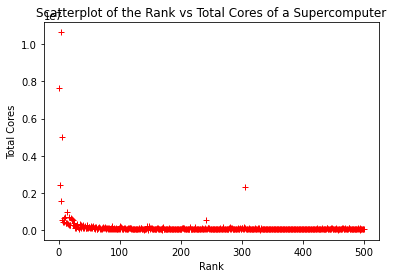

In [81]:
plt.plot(supercom_df['Rank'], supercom_df['Total Cores'], 'r+')
plt.xlabel('Rank')
plt.ylabel('Total Cores')
plt.title('Scatterplot of the Rank vs Total Cores of a Supercomputer')

From the scatterplot produced above, it is apparent that there is a relationship between the two variables. More specifically, a strong, linear, and negative relationship can be observed between the `Rank` and the `Total Cores` of a supercomputer.

Furthermore, we can also use the [`spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) function to compute for the Spearman Correlation value of these variables. This can be used to discover the strength of the a link between two columns from the dataset.

In [82]:
coef, p = stats.spearmanr(supercom_df['Rank'], supercom_df['Total Cores'])
print('Spearman\'s Correlation coefficient = %.2f\n' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated p = %.2f' % p)
else:
	print('Samples are correlated p = %.2f' % p)

Spearman's Correlation coefficient = -0.57

Samples are correlated p = 0.00


From both the scatterplot and the Spearman correlation coefficient, we can come to a definitive conclusion that there is a monotonic, specifically a negative, association between the two variables. Simply put, as the `Rank` of a supercomputer increases, the number of `Total Cores` it has decreases.

### Which `Segment` has the most number of supercomputers?
The `Segment` variable refers to the current sector that uses the supercomputer. For this part, we would be checking which segment appears most frequently in the dataset; this value is also known as the mode, a measure of central tendency. 

To start, the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function is used to group the observations according to their country. The [`agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) function is called to aggregate the count, which would then be sorted using the [`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) function.

In [83]:
grouped_df = supercom_df.groupby("Segment")
grouped_df = grouped_df["Name"].agg(['count']).sort_values(['count'], ascending=False)
print(grouped_df)

            count
Segment          
Industry      132
Research       86
Academic       62
Government     24
Vendor          8
Others          3


To better visualize the results of this table, we can use the [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function to display a bar graph using the given data. 

A bar graph is most suitable to show which country appears most frequently as bar graphs allows one to visually distinguish the differences between any two countries. This would allow us to quickly observe which country has the most supercomputers, especially in comparison to other countries.

In [84]:
country_df['count'].plot(kind="bar")

plt.title("Number of Supercomputers per Segment")
plt.xlabel("Segment Name")
plt.ylabel("Number of Supercomputers")

NameError: name 'country_df' is not defined

From both the list and the graph, we can see that the mode or the segment that appears most frequently in the list is Industry. With this, we can conclude that the majority of high-performance supercomputers in the world are currently being used by the industry.

### How varied are the `Rmax [TFlop/s]` values of the supercomputers?

The `Rmax [TFlop/s]` variable refers to the maximum LINPACK performance achieved by the supercomputer. In this part, we will check the dispersion of values in the Rmax variable using the measures of dispersion, particularly range and interquartile range.  

Before performing any analysis, the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function is called for us to see some of the summarized statistics about the variable.

In [ ]:
rmax_df = supercom_df['Rmax [TFlop/s]']
rmax_df.describe()

First, the range of the values is found by obtaining the minimum and maximum values in the dataset. The range is a good indicator of the dispersion of values in small datasets, although the value may be misleading if there are any outliers.

We can compute the **range** using the formula:

$$range = max - min$$

In [ ]:
rmax_max = max(rmax_df)
rmax_min = min(rmax_df)
rmax_range = rmax_max - rmax_min
print('Range: {:.2f}'.format(rmax_range))

The range of the Rmax values of the supercomputers is 440693.16 TFlop/s, which signifies high variability in the given data. This may be possible due to any outliers in the data which affected the whole range. Knowing this, our next step is to identify the interquartile range (IQR); this measure can be used as it is based on values from the middle half of the distribution, effectively avoiding any outliers. 

We can compute the **interquartile range** using the formula:

$$IQR = Q3 - Q1$$

From using the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function earlier, we were able to get the first quartile (25%) and third quartile (75%) of the `Rmax [TFlop/s]` variable. Aside from this, we can also use the [`quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) function to get these values.

In [ ]:
Q3 = np.quantile(rmax_df, 0.75)
Q1 = np.quantile(rmax_df, 0.25)
IQR = Q3 - Q1
print("IQR: %.2f" % (IQR))

Comparing the IQR (1073.02 TFlop/s) to the range (440693.16 TFlop/s), there is a noticable difference between the two, which means that we can confirm the existence of an unusually high outlier in the data. 

For clearer analysis, the data will be visualized as a box plot; the box plot will be used to quickly see the dispersion of the data and also highlight any potential outliers in the data.  

In [ ]:
rmax_df.plot.box(grid='True', title='Box plot of Rmax [TFlop/s]')

The earlier conclusions are evident in this boxplot; several outliers in the data should be adequately taken into account when forming insights about the dataset.

Returning to the question at hand, the range should not be used as a measure of dispersion in this specific case due to outliers. Instead, a much more accurate representation of the data's variance is the quartiles and the IQR. Therefore, from the values of the Q1 and Q3 obtained earlier, we are able to properly conclude that the middle 50% of our data is spread from 1649.110000 TFlop/s to 2722.127500 TFlop/s with an IQR of 1073.02 TFlop/s.

# Research Questions
Now that we have sufficiently explored the dataset and found patterns and relationships between variables, the research questions can now be formulated. Research questions define the scope of a project, which would effectively guide us in analyzing the dataset. 

As seen from the EDA done in the previous section, supercomputers are widely used in professional sectors. This assumption raises several interesting questions, particularly concerning the `Segment` variable of the supercomputer. These questions would be the core focus of the research questions, as we aim to properly investigate whether or not the performance and specifications of a supercomputer rely on its purpose.

#### Is there a significant difference between the means of the `Rmax [TFlop/s]` of the professional sectors?
In high-performance computing, Rmax and Rpeak are scores used to rank supercomputers based on their performance using the LINPACK Benchmark. A system's Rmax score describes its maximal achieved performance; the Rpeak score describes its theoretical peak performance. /* TODO: explain kung bakit rmax pinili hindi rpeak: Rpeak is just a theoretical value, while yung rmax is ung mismong lumabas na value nung nagexperiment sila (ginamit yung supercomputer for LINPACK) */ This research question aims to determine /* parang kapag nalaman mo kung may difference yung average Rmax between diff. segments, pwede siyang makatulong na maging basis sa future supercomputers. like if magiging sagot is mayroong significant difference pwede siyang mag-cause ng **future studies** na magsasabi if kailangan mong malaman yung purpose ng supercomputer before siya gawin since may expectation sa supercomputer mo basae sa purpose niya. pero, if wala namang significant different, pwedeng magkaroon ng **future studies** na kung saan hahanapin yung "pagkakasunduan" na expectation sa Rmax ng mga segments-> general purpose supercomputer. */

/* importance and significance: all in all, pwede siya makatulong future supercomputers na para maging at least guidelines sa mga minimum na ineexpect sa kanila. */

Professional sectors such as academic, government, industry and research were chosen because these four sectors are the main driving factors of the development of the nation. /* TODO: define what driving factors of development mean + kapag nadefine mo na, connect mo yung magiging dulot ng better supercomputers sa development ng world */

#### Is there a significant relationship between a supercomputer's `Processor Technology` and the `Segment` of the industry it belongs in? 
/* TODO: purpose/importance ng processor technology sa supercomputer. if makikita na mayroong significant relationship between the variables, pwede siya magkaroon ng supporting study na inaalam kung bakit nga ba nakakaapekto ung segment/purpose sa choice ng processor technology. like, pwedeng alamin na ano yung hinahanap ng isang industry sa processor technology na naglelead na ito yung pipiliin if ito yung purpose.*/

/* importance and significance: smth like supercomputers are used by the diff. sectors para mapadali yung development ng buhay ng karamihan at makagawa ng changes so understanding paano nakakaaffect yung diff. factors sa paggawa ng supercomputer ay pwedeng maglead sa paggawa ng better supercomputers to handle diff. needs */

# Statistical Inference
In order for us to find the answer to our research questions, we have to undergo the process of statistical inference. In this notebook, statistical inference for means and for categorical data would be both utilized, especifically ANOVA and Two-way Table that uses Chi Square Statistic.

### `Rmax` of Supercomputers across Professional `Segments` of the Industry

#### Step 1: Data Pre-processing
Because the `Rmax [TFlop/s]` column is a continuous numerical data, we need to check if there is an outlier in the data. The interquartile range (IQR) is used to remove the outliers by setting a limit around the dataset's first quartile (*Q1*) and third quartile (*Q3*). This means that the range of the `Rmax [TFlop/s]` would be 1.5 times times the IQR lower than the Q1 to the 1.5 times IQR higher than Q3.

In [ ]:
rmax_df = supercom_df

Q3 = np.quantile(rmax_df['Rmax [TFlop/s]'], 0.75)
Q1 = np.quantile(rmax_df['Rmax [TFlop/s]'], 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in rmax_df['Rmax [TFlop/s]'] if ((x > lower_range) & (x < upper_range))]
filtered_data = rmax_df.loc[rmax_df['Rmax [TFlop/s]'].isin(outlier_free_list)]

data = filtered_data
grouped_df = data
print(grouped_df['Rmax [TFlop/s]'].count())

From 500 values, the number of `Rmax [TFlop/s]` values went down to 435. This means that there are 65 observations that are outliers. In this scenario, it is better to drop the outliers as we want to find out about if there is a significant difference between the `Rmax [TFlop/s]` value of the supercomputers of the `Segments`. As such, having outliers might greatly affect the mean of a group, which would result to the value of its mean not representing the whole of its sample group.

#### Step 2: Computing the means of each `Segment`
Since the given data set gives the `Rmax [TFlop/s]` of each supercomputer, we first have to group the supercomputers based on the value of their `Segment` variable. This can be done with the use of the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function. Additionally, using the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function, we can compute for the mean and standard deviation of each group, while creating columns for the two and the number of observations inside each group.

In [ ]:
grouped_df = grouped_df.groupby("Segment")
grouped_df = grouped_df['Rmax [TFlop/s]'].agg(['count','mean', 'std']).reset_index()
print(grouped_df)

The use of the aforementioned two functions resulted to a data frame with six observations. Each of these observations represent one group from the `Segment` variable. However, since our research question focuses only on the professional sectors of the industry (i.e. academic, government, industry and research), we would need to drop the other two segments using the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function.

In [ ]:
grouped_df = grouped_df.drop([grouped_df.index[5], grouped_df.index[3]]).reset_index()
grouped_df = grouped_df.drop("index", axis=1)
print(grouped_df)

#### Step 2: Checking if our data is normally distributed
We can say that each of our groups are nearly normally distributed because they all pass the Central Limit Theorem. The Central Limit Theorem states that when we have a sufficiently large sample of independent observations, we can assume that the sampling distribution will be nearly distributed. The Central Limit Theorem holds true for sample sizes that are over 30.

Since each of our groups have a sample size of at least 30 samples which are independent of each other, we can say that the Central Limit Theorem holds for our samples. Thus, we can say that our sampling distribution is nearly normally distributed.


#### Step 4: Deciding which Statistical Inference for Means method
As we aim to see if there is a significant difference between the mean of more than two groups, the correct method to use is Analysis of Variance (ANOVA). However, ANOVA testing will not identify which `Segment` group differs from the other groups or how many groups has significant differences with each other.

#### Step 5: Calculating for the Overall Mean
Since we are going to use ANOVA, there is also a need to compute for the overall mean of the groups. The `overall mean` refers to the total mean of each sample. In the computation of the `overall mean`, we add each of the samples and divide the sum with the total number of samples. For this research question, we will add all of the 477 samples (disregarding their groups, first), and divide the sum by 477. 

However, the mean of the group means is not always equal to the `overall mean`. Because of this, we have to refer to the original data set and remove the samples that are out of the scope of this research question. Thus, we have to remove the samples that are from the `Segment` Vendor and Others, as we are only calculating for the mean of the professional sectors.

In [ ]:
new_df = data.copy()

index_names = new_df[new_df['Segment'] == 'Others'].index
index_names2 = new_df[new_df['Segment'] == 'Vendor'].index

new_df.drop(index_names, inplace=True)
new_df.drop(index_names2, inplace=True)

As we now have the data set that is relevant to our research question, we can now calculate the `overall mean` using the [`mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) function.

In [ ]:
overall_mean = new_df['Rmax [TFlop/s]'].mean()
print('\nOverall mean: ', overall_mean)

#### Step 6: Setting the Hypothesis
To be able to know if there is a significant difference between the means of the `Rmax [TFlop/s]` of the professional sectors, we have to set up the null and alternative hypotheses. For this research question, the null hypothesis states that there is no significant difference between the means of the `Rmax [TFlop/s]` of the professional sector. 

$H_{0}$ (null hypothesis): $μ_{A}$ = $μ_{G}$ = $μ_{I}$ = $μ_{R}$

On the other hand, the alternative hypothesis states that there is at least one mean that varies from the rest of the group.

$H_{A}$ (alternative hypothesis): At least one of the means varies

#### Step 7: Setting the Significance level
For this research question, we will be setting the significance level (α) to 0.05. This means that if the p-value that we would be getting from the F-value is less than or equal 0.05, we will be rejecting the null hypothesis. On the other hand, if the p-value is greater than 0.05, we will be accepting the null hypothesis.

α = 0.05

This also implies that there is a 5% risk of rejecting the null hypothesis when it should have been accepted (i.e. Type I Error).

#### Step 8: Calculating the Confidence Interval and Margin of Error
For this research, the confidence interval for each of the group's mean is computed in order to set the range that the groups' `Rmax [TFlop/s]` mean would fall in. 

In [ ]:
z_star_95 = stats.norm.ppf(0.975)
margin_of_error = []
min_interval = []
max_interval = []

for x in range (4):
    temp = grouped_df.iloc[x]
    margin = z_star_95 * temp["std"]/np.sqrt(temp["count"])
    margin_of_error.append (margin)
    min_interval.append(temp["mean"] - margin)
    max_interval.append(temp["mean"] + margin)
    
    
grouped_df["margin of error"] = margin_of_error
grouped_df["min confidence interval"] = min_interval
grouped_df["max confidence interval"] = max_interval

grouped_df

Additionally, the margin of error and the confidence interval of the all samples are also computed.

In [ ]:
overall_std = new_df['Rmax [TFlop/s]'].std()
overall_margin = z_star_95 * overall_std/np.sqrt(len(new_df))
min_overall = overall_mean - overall_margin
max_overall = overall_mean + overall_margin

print('Overall sample:')
print('Margin of error: ', overall_margin)
print('Confidence interval: (', min_overall, ",", max_overall, ')')

#### Step 9: Calculating the Sum of Squares
Before calculating the sum of squares, we first need to set the value of *k* and *n*. Since *k* refers to the total number of groups, the value of *k* would be equal to four (i.e. academic, research, industry, government). On the other hand, *n* refers to the total sample size across the group. This means that we have to add the sample size of the group, which can be done through the use of the [`sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function on the `count` column.

In [ ]:
k = 4 # number of groups
n = grouped_df['count'].sum() # total sample size across the groups

print("Total number of groups (k): ", k)
print("Total Sample Size across the groups (n): ", n)

Since we already have the value for *k* and *n*, we can calculate the Sum of Squares Total (SST) and  Sum of Squares Between Groups (SSG). This can be done with the use of [`for loop`](https://docs.python.org/3/tutorial/controlflow.html) of python since we need to iterate through the groups (for SSG) and through the observations (for SST). Although, the data set used for SST only includes the observations that are used for this research question, and not the original data set.

The [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) function was used to easily get one whole observation from the data frame.

In [ ]:
SSG = 0
SST = 0 
for x in range (k):
    temp = grouped_df.iloc[x]
    SSG = SSG + float (temp ["count"]) * (float (temp ["mean"]) - overall_mean)**2

print("SSG: ", SSG)

for x in range (n):
    temp = new_df.iloc[x]
    SST = SST + float (overall_mean - temp ["Rmax [TFlop/s]"])**2
    
print("SST: ", SST)

#### Step 10: Calculating the Degree of Freedom
For ANOVA, there are two degrees of freedom used: the degree of freedom within groups(*df2*) and the degree of freedom between groups(*df1*). These two values are to be used to look up the *p-value* from the F-table.

In [ ]:
df1 = k - 1 
df2 = n - k 

print ("df1: ", df1)
print ("df2: ", df2)

#### Step 11: Calculating the Mean Squares
After determining the *df1* and *df2*, we can continue on to calculating the mean squares. To calculate for the F-statistic value, we have to compute for the Mean Squared variation due to Groups (MSG) and the Mean Square Error (MSE) using their respective formulas.

In [ ]:
MSG = 1/df1 * SSG
MSE = 1/df2 * (SST - SSG)

print ("MSG: ", MSG)
print ("MSE: ", MSE)

#### Step 12: Calculate the F - statistic
The F-statistic value is also needed in order to get the p-value from the F-table. This value can be calculated by dividing the MSG by MSE.

In [ ]:
F = MSG / MSE

print ("F - value: ", F)

#### Step 13: Looking up the p-value from the F-table
Using the F-table, *df1*, *df2* and the *F-value*, we were able to get the *p-value* of 6.023437432591796e-13 (**p-value = 6.023437432591796e-13**). However, we may also use scipy.stats as it has a built-in function that allows the computation for the F-statistic and the p-value. Using the [`f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function, we can get the F-statistic value and the p-value, given the observations of the different groups.

In [ ]:
print(stats.f_oneway(data.loc[supercom_df["Segment"] == 'Academic']["Rmax [TFlop/s]"],
               data.loc[supercom_df["Segment"] == 'Government']["Rmax [TFlop/s]"],
               data.loc[supercom_df["Segment"] == 'Industry']["Rmax [TFlop/s]"],
               data.loc[supercom_df["Segment"] == 'Research']["Rmax [TFlop/s]"]))

Since the p-value (6.023437432591796e-13) is less than the significance level (0.05), reject the null hypothesis. 

For comparison, we can also compute for the *p-value* of the original dataframe `supercom_df`. Note that we have not removed the outliers in this dataframe.

In [ ]:
print(stats.f_oneway(supercom_df.loc[supercom_df["Segment"] == 'Academic']["Rmax [TFlop/s]"],
               supercom_df.loc[supercom_df["Segment"] == 'Government']["Rmax [TFlop/s]"],
               supercom_df.loc[supercom_df["Segment"] == 'Industry']["Rmax [TFlop/s]"],
               supercom_df.loc[supercom_df["Segment"] == 'Research']["Rmax [TFlop/s]"]))

From the two p-values that we have gotten from before and after removing the outliers in the dataframe for the value of `Rmax [TFlop/s]`, we can see that, in both versions, the null hypothesis would be rejected as the p-value is less than the significance level.

### Comparison of the `Processor Technology` preference of different `Segment` of the Industry

#### Step 1: Deciding which Statistical Inference for Categorical Data method
As our research question deals with determining if there is a significant relationship between two categorical variable, the Chi-square statistic can be used to answer this question. However, there are two conditions that our data set must pass in order to use this statistic: (1) the observations must be independent, and (2) there must be at least five samples each group.

The observations in the data set are independent as they are not affected by each other. This means that an observation's values is not influenced by another observation. However, to count how many observations are within each group, we would need to use the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function.

In [ ]:
grouped_df = supercom_df.groupby("Segment")
grouped_df = grouped_df['Processor Technology'].agg(['count']).reset_index()
print(grouped_df)

From the output of the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function, we can see that each group has a sample size of at least five. This means that our data set passes the two conditions of using Chi-square statistics. 

#### Step 2: Setting the Hypothesis

$H_{0}$ (null hypothesis): There is no significant relationship between a supercomputer's `Process Technology` and the `Segment` of the industry it belongs in.

$H_{A}$ (alternative hypothesis): There is a significant relationship between a supercomputer's `Process Technology` and the `Segment` of the industry it belongs in.

#### Step 3: Setting the Significance level
Like in the previous research question, we would be setting the significant level to 0.05 (α = 0.05). This value would be our basis in accepting or rejecting the null hypothesis. Having a p-value less than or equal 0.05 would mean that there is a significant relationship between a supercomputer's `Process Technology` and the `Segment` of the industry it belongs in. On the other hand, when the p-value is greater than 0.05, it means that there is no significant relationship between the two categorical variables.

#### Step 4: Preparing the Two-way table
In order to use the Chi-square statistic on our data, we need to prepare the table that would be used in the computation of the chi-statistic. Since we are looking for the relationship of two categorical variables, we would be creating a two-way table with the `Segment` groups being its column headers and the types of `Processor Technology` as its rows. 

Using the [`crosstab`](https://www.google.com/search?q=crosstab+pandas&rlz=1C1CHBF_enPH856PH856&oq=crosstab+pandas&aqs=chrome..69i57j0i512l6j0i390.4074j0j4&sourceid=chrome&ie=UTF-8) function, we were able to properly create the two-way table. In this function, the first parameter refers to what values are to be grouped by in the rows and the second parameter is for the columns. 

In [ ]:
crosstab = pd.crosstab(supercom_df['Processor Technology'], supercom_df['Segment'])
print(crosstab)

#### Step 5: Computing for the Chi-statistic value and Getting its p-value
Once we were able to derive the two-way table that holds the count of observation for each `Segment` that has each of the `Processor Technology`, we can move to computing for the chi-statistic value aand looking for its corresponding p-value. This can be done using the [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function. This function returns the chi-statistic value, p-value and the degree of freedom.

In [ ]:
stats.chi2_contingency(crosstab)

From the [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function, we were able to get the chi-statistic value of 308.5254186149681, the degree of freedom of our data set *85* and its p-value 4.143223560249361e-27.

#### Step 6: Conclusion
Since the p-value (4.143223560249361e-27) is less than the significance level (0.05), reject the null hypothesis.

# Insights and Conclusions
/* introduction */

#### Is there a significant difference between the means of the `Rmax [TFlop/s]` of the professional sectors?
Since the p-value (6.02e-13) is less than the significance level (0.05), the null hypothesis is rejected. Thus, the data provided strong evidence that at least one of the group's mean `Rmax [TFlop/s]` deviates from the others under the significance level of 5%. 

#### Is there a significant relationship between a supercomputer's `Processor Technology` and the `Segment` of the industry it belongs in?
Since the p-value (4.14e-27) is less than the significance level, the null hypothesis is rejected. Thus, we can conclude that there is a statistically significant relationship between the variables `Processor Technology` and `Segment`.

## References
*Chi Square | Practical Applications of Statistics in the Social Sciences* (n.d.). University of Southampton. Retrieved August 9, 2021, from https://www.southampton.ac.uk/passs/full_time_education/bivariate_analysis/chi_square.page

*Frequent Asked Questions on the LINPACK Benchmark*. (2007, May 8). Netlib. http://www.netlib.org/utk/people/JackDongarra/faq-linpack.html#_Toc27885709

*How to Perform Analysis of Variance (ANOVA) - Step By Step Procedure*. (2018, March 7). The Genius Blog. https://kindsonthegenius.com/blog/how-to-perform-analysis-of-variance-anova-step-by-step-procedure/

*Identifying Outliers: IQR Method | STAT 200*. (n.d.). Penn State University. Retrieved August 9, 2021, from https://online.stat.psu.edu/stat200/lesson/3/3.2

*Introduction and Objectives*. (n.d.). Top500. Retrieved August 9, 2021, from https://www.top500.org/project/introduction/

Moffitt, C. (2018, October 8). *Pandas Crosstab Explained*. Practical Business Python. https://pbpython.com/pandas-crosstab.html

*Understanding the Interquartile Range in Statistics*. (n.d.). ThoughtCo. Retrieved August 9, 2021, from https://www.thoughtco.com/what-is-the-interquartile-range-3126245